# Initial

In [16]:
!pip install smogn

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("final_df.csv")

In [3]:
label_df = df[["TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 'Last1MothNominal','review_rating', 'review_count']]
label_df

,TotalTransaction,TotalNominalTransaction,Last1MonthTransaction,Last1MothNominal,review_rating,review_count
0,15225,1772000,24,447000,4.000.000,4
1,15318,6458500,41,2248000,4.400.000,190
2,15325,930000,7,186000,4.900.000,7
3,15325,1213000,5,630500,4.100.000,33
4,15413,12818000,129,2630000,4.400.000,14
...,...,...,...,...,...,...
2504,15220,1088729,7,491000,5.000.000,4
2505,15228,1086891979,403,270673633,4.400.000,343
2506,15310,3465000,165,1816000,5.000.000,1
2507,15344,2687000,8,440000,4.600.000,60


In [4]:
df = df.drop(columns=['Unnamed: 0',"TotalTransaction", 'TotalNominalTransaction', 'Last1MonthTransaction', 
                      'review_rating', 'review_count','Unnamed: 0.1'])
# "geocoded_kelurahan_alternative","Kelurahan", 'jumlah_Unclassified_per_kelurahan',
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category,Last1MothNominal,market_share,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,60,976949084,4.110874,Kafe dan Minuman,447000,0.000458,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,3,177,2297219696,5.181784,Otomotif,2248000,0.000979,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,0,28,153064649,3.367296,Restoran Umum,186000,0.001215,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,2,70,813504922,4.262680,Apotek dan Produk Kesehatan Lainnya,630500,0.000775,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,5,49,232321665,3.912023,Restoran Umum,2630000,0.011321,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,1,69,525602305,4.248495,Retail,491000,0.000934,0.101449,0.710145,2848.492754
2505,1,False,False,False,False,False,False,False,True,False,...,7,57,829581740,4.060443,Materials,270673633,0.326277,0.017544,0.017544,383.350877
2506,8,False,False,False,False,True,False,False,False,False,...,1,44,421505251,3.806662,Kafe dan Minuman,1816000,0.004308,0.181818,1.454545,3746.363636
2507,9,False,False,False,False,False,False,False,False,False,...,0,31,60142072,3.465736,Retail,440000,0.007316,0.290323,2.612903,4406.225806


In [5]:
final_df = df.drop(columns=['Last1MothNominal','Kelurahan','category','market_share','Last1MothNominal'])
# "geocoded_kelurahan_alternative","Kelurahan", 'jumlah_Unclassified_per_kelurahan',
final_df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,0,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,1,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,1,0,0,2,70,813504922,4.262680,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,7,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754
2505,1,False,False,False,False,False,False,False,True,False,...,10,4,1,7,57,829581740,4.060443,0.017544,0.017544,383.350877
2506,8,False,False,False,False,True,False,False,False,False,...,0,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636
2507,9,False,False,False,False,False,False,False,False,False,...,0,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806


In [6]:
X = final_df.values
Y = df["Last1MothNominal"].values

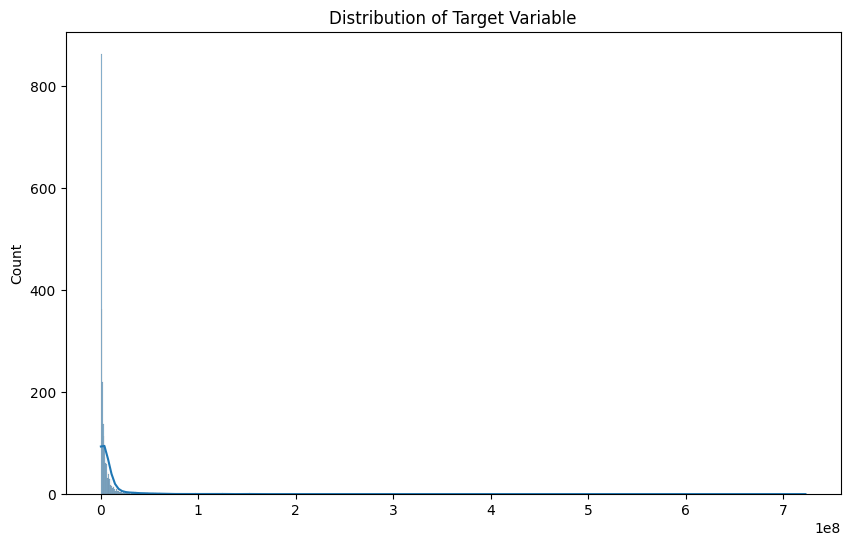

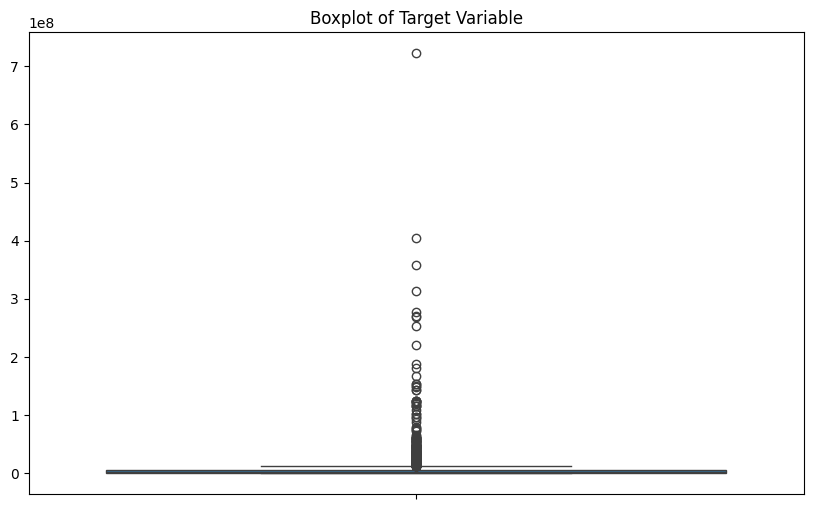

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

plt.figure(figsize=(10, 6))
sns.histplot(Y, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y)
plt.title('Boxplot of Target Variable')
plt.show()

In [8]:
Q1 = np.percentile(Y, 25)
Q3 = np.percentile(Y, 75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

outliers = np.where((Y < lower_bound) | (Y > upper_bound))[0]
print(f"Number of outliers: {len(outliers)}")
print(f"Indices of outliers: {outliers}")

Lower bound: -6509500.0
Upper bound: 11958500.0
Number of outliers: 274
Indices of outliers: [   9   10   26   27   43   58   66   68  105  118  128  130  134  142
  148  153  188  194  198  206  210  226  236  239  256  286  294  301
  317  325  327  331  337  339  343  350  353  357  361  362  363  364
  387  395  407  417  428  447  471  472  479  488  490  491  494  507
  516  522  531  534  537  541  545  546  547  569  570  576  604  605
  606  615  620  623  654  659  679  682  683  704  708  727  739  740
  742  754  755  761  766  775  782  801  819  821  835  841  849  890
  904  922  951  954  956  980  981  984  990  998 1000 1002 1008 1039
 1046 1070 1089 1109 1121 1125 1126 1151 1152 1156 1159 1163 1170 1185
 1208 1209 1225 1229 1242 1246 1252 1255 1282 1288 1293 1299 1336 1350
 1376 1381 1383 1388 1389 1395 1398 1404 1409 1410 1423 1428 1437 1451
 1455 1459 1461 1469 1471 1478 1485 1502 1504 1508 1510 1511 1521 1530
 1535 1538 1550 1556 1573 1574 1580 1586 1593 1608 1611

In [9]:
Y_clean = Y[(Y >= lower_bound) & (Y <= upper_bound)]
X_clean = X[(Y >= lower_bound) & (Y <= upper_bound)]

In [10]:
print(f"Original dataset size: {len(Y)}")
print(f"Cleaned dataset size: {len(Y_clean)}")

Original dataset size: 2509
Cleaned dataset size: 2235


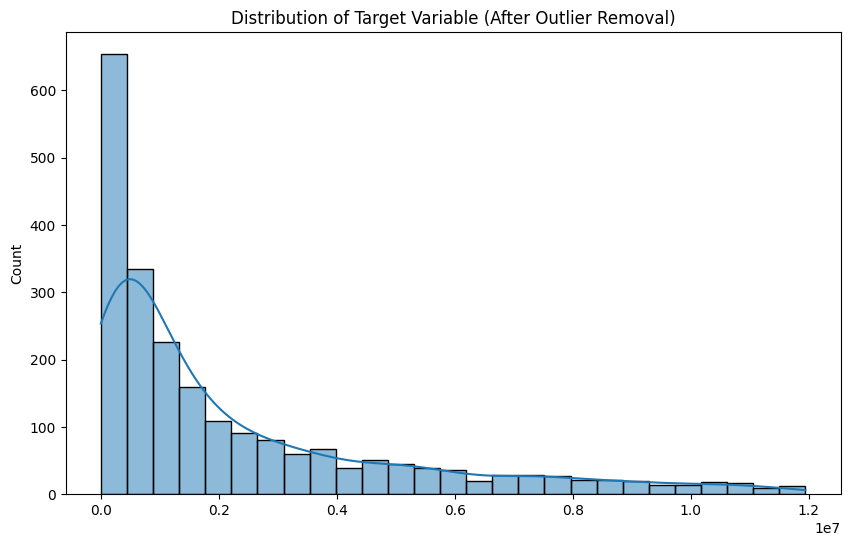

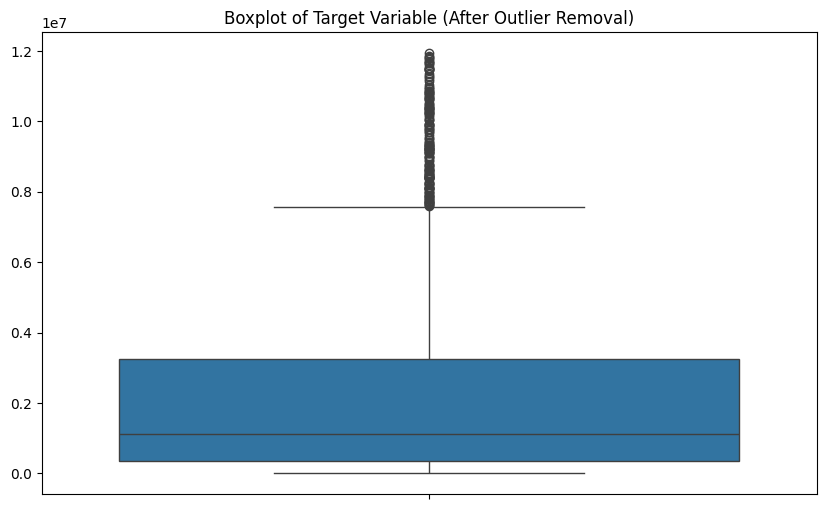

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(Y_clean, kde=True)
plt.title('Distribution of Target Variable (After Outlier Removal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(Y_clean)
plt.title('Boxplot of Target Variable (After Outlier Removal)')
plt.show()

In [12]:
df = pd.DataFrame(data=X_clean,columns=final_df.columns)
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mall_per_kelurahan,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population
0,5,False,False,False,False,True,False,False,False,False,...,1,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333
1,2,False,False,False,False,False,False,False,False,False,...,0,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011
2,10,False,False,False,False,False,False,False,False,False,...,1,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286
3,2,True,False,False,False,False,False,False,False,False,...,1,0,0,2,70,813504922,4.26268,0.028571,0.057143,374.714286
4,25,False,False,False,False,False,False,False,False,False,...,0,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,23,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.333333,7.666667,9359.333333
2231,7,False,False,False,False,False,False,False,False,False,...,22,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754
2232,8,False,False,False,False,True,False,False,False,False,...,0,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636
2233,9,False,False,False,False,False,False,False,False,False,...,0,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806


In [13]:
df["Last1MonthNominal"] = Y_clean
df

,kompetitor_in_kelurahan,Apotek dan Produk Kesehatan Lainnya,Clothing,Entertainment,Jasa,Kafe dan Minuman,Kebersihan,Kosmetik,Materials,Olahraga,...,jumlah_Mosques_per_kelurahan,jumlah_Transportation Hub_per_kelurahan,jumlah_Medical Services_per_kelurahan,count_UMKM,sum_transaction_nominal_per_area,log_count_UMKM,category_density_in_area,competition_index,density_x_population,Last1MonthNominal
0,5,False,False,False,False,True,False,False,False,False,...,5,0,1,60,976949084,4.110874,0.083333,0.416667,2230.333333,447000
1,2,False,False,False,False,False,False,False,False,False,...,3,9,3,177,2297219696,5.181784,0.011299,0.022599,329.774011,2248000
2,10,False,False,False,False,False,False,False,False,False,...,1,0,0,28,153064649,3.367296,0.357143,3.571429,7300.714286,186000
3,2,True,False,False,False,False,False,False,False,False,...,0,0,2,70,813504922,4.26268,0.028571,0.057143,374.714286,630500
4,25,False,False,False,False,False,False,False,False,False,...,2,0,5,49,232321665,3.912023,0.510204,12.755102,26436.734694,2630000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,23,False,False,False,False,False,False,False,False,False,...,2,0,1,69,525602305,4.248495,0.333333,7.666667,9359.333333,89000
2231,7,False,False,False,False,False,False,False,False,False,...,2,0,1,69,525602305,4.248495,0.101449,0.710145,2848.492754,491000
2232,8,False,False,False,False,True,False,False,False,False,...,0,2,1,44,421505251,3.806662,0.181818,1.454545,3746.363636,1816000
2233,9,False,False,False,False,False,False,False,False,False,...,4,2,0,31,60142072,3.465736,0.290323,2.612903,4406.225806,440000


In [38]:
df_perm = df

# Oversampling

In [21]:
from smogn import smoter

In [61]:
# test_df_o = df
test_df_o.columns

Index(['kompetitor_in_kelurahan', 'Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung', 'jumlah_penduduk_akhir_2023',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pel

In [23]:
X = test_df_o.drop('Last1MonthNominal', axis=1)
Y = test_df_o['Last1MonthNominal']

In [28]:
print(X.shape)
print(Y.shape)
print(X.dtypes)
print(Y.dtype)

(2235, 81)
(2235,)
kompetitor_in_kelurahan                object
Apotek dan Produk Kesehatan Lainnya    object
Clothing                               object
Entertainment                          object
Jasa                                   object
                                        ...  
sum_transaction_nominal_per_area       object
log_count_UMKM                         object
category_density_in_area               object
competition_index                      object
density_x_population                   object
Length: 81, dtype: object
int64


In [32]:
temp = pd.concat([X,Y],axis=1)
temp = temp.apply(pd.to_numeric)

In [66]:
temp2 = test_df_o.apply(pd.to_numeric)

In [34]:
resampled_df = smoter(
    data=temp,
    y=Y.name,
    k=5,  # number of nearest neighbors
    samp_method='extreme'  # focus on extreme values
)

C:\Users\pandu.prawira\AppData\Local\Programs\Python\Python312\Lib\site-packages\smogn\over_sampling.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 424
Categories (2, int64): [0, 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.iloc[:, j] = pd.Categorical(pd.factorize(
C:\Users\pandu.prawira\AppData\Local\Programs\Python\Python312\Lib\site-packages\smogn\over_sampling.py:128: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 424
Categories (2, int64): [0, 1]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.iloc[:, j] = pd.Categorical(pd.factorize(
C:\Users\pandu.prawira\AppData\Local\Programs\Python\Python312\Lib\site-packages\smogn\over_sampling.py:128: FutureWar

In [44]:
df = resampled_df

In [36]:
X = resampled_df.drop('Last1MonthNominal', axis=1)
Y = resampled_df['Last1MonthNominal']

In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [64]:
numerical_features = ['density_x_population', 'category_density_in_area', 'competition_index',
                    'jumlah_penduduk_akhir_2023','kompetitor_in_kelurahan',
       'penduduk_laki2', 'penduduk_perempuan', 'penduduk_beragama_islam',
       'penduduk_beragama_kristen', 'penduduk_beragama_katholik',
       'penduduk_beragama_hindu', 'penduduk_beragama_buddha',
       'penduduk_beragama_konghucu', 'penduduk_beragama_kepercayaan',
       'penduduk_belum_sekolah', 'penduduk_belum_SD', 'penduduk_SD',
       'penduduk_SMP', 'penduduk_SMA', 'penduduk_d1_d2', 'penduduk_d3',
       'penduduk_s1', 'penduduk_s2', 'penduduk_s3',
       'penduduk_belum_atau_tidak_bekerja', 'penduduk_mengurus_rumah_tangga',
       'penduduk_pelajar', 'penduduk_pensiunan', 'penduduk_bekerja',
       'penduduk_0_sampai_4', 'penduduk_5_sampai_9', 'penduduk_10_sampai_14',
       'penduduk_15_sampai_19', 'penduduk_20_sampai_24',
       'penduduk_25_sampai_29', 'penduduk_30_sampai_34',
       'penduduk_35_sampai_39', 'penduduk_40_sampai_44',
       'penduduk_45_sampai_49', 'penduduk_50_sampai_54',
       'penduduk_55_sampai_59', 'penduduk_60_sampai_64',
       'penduduk_65_sampai_69', 'penduduk_70_keatas',
       'jumlah_Parks_per_kelurahan',
       'jumlah_Temporary Accomodations_per_kelurahan',
       'jumlah_Churches_per_kelurahan',
       'jumlah_Academic Institutions_per_kelurahan',
       'jumlah_Gas/SPBU_per_kelurahan', 'jumlah_Market_per_kelurahan',
       'jumlah_Offices_per_kelurahan', 'jumlah_Residences_per_kelurahan',
       'jumlah_Tourist_per_kelurahan', 'jumlah_Mall_per_kelurahan',
       'jumlah_Mosques_per_kelurahan',
       'jumlah_Transportation Hub_per_kelurahan',
       'jumlah_Medical Services_per_kelurahan', 'count_UMKM',
       'sum_transaction_nominal_per_area', 'log_count_UMKM','transaction_per_business',
                   'density_x_population_squared',
       'density_x_population_cubed', 'log_density_x_population',
       'category_density_in_area_squared', 'category_density_in_area_cubed',
       'log_category_density_in_area', 'competition_index_squared',
       'competition_index_cubed', 'log_competition_index']
categorical_features = ['Apotek dan Produk Kesehatan Lainnya',
       'Clothing', 'Entertainment', 'Jasa', 'Kafe dan Minuman', 'Kebersihan',
       'Kosmetik', 'Materials', 'Olahraga', 'Optics', 'Otomotif',
       'Peralatan dan Barang Elektronik', 'Photo', 'Printing', 'Properti',
       'Regional', 'Restoran Umum', 'Retail', 'Roti, Kue, dan Cemilan Lainnya',
       'Transportation', 'Warung']

print(len(categorical_features))
print(len(numeric_features))
print(len(df.columns))

21
70
92


In [45]:

# Custom transformer for log transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log1p(X)

# Advanced feature engineering
def advanced_feature_engineering(df):
    # List of columns to transform
    columns_to_transform = ['density_x_population', 'category_density_in_area', 'competition_index']
    
    for col in columns_to_transform:
        # Check if the column exists
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in the dataframe. Skipping...")
            continue
        
        # Ensure the column is numeric
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Warning: Column '{col}' is not numeric. Attempting to convert...")
            df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Handle potential negative or zero values
        df[col] = df[col].clip(lower=0.0001)  # Replace negative/zero values with a small positive number
        
        # Apply transformations
        df[f'{col}_squared'] = df[col] ** 2
        df[f'{col}_cubed'] = df[col] ** 3
        df[f'log_{col}'] = np.log1p(df[col])
    
    # Add other feature engineering steps here
    # For example:
    
    # Ratio features (make sure 'sum_transaction_nominal_per_area' and 'total_businesses_in_area' exist and are numeric)
    if all(col in df.columns for col in ['sum_transaction_nominal_per_area', 'count_UMKM']):
        df['transaction_per_business'] = (
            df['sum_transaction_nominal_per_area'].astype(float) / 
            df['count_UMKM'].astype(float).replace(0, 1)  # Avoid division by zero
        )
    
    return df

In [69]:
# Anomaly detection
def remove_outliers(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]
    return df

# Prepare data
df = advanced_feature_engineering(resampled_df)
df = remove_outliers(resampled_df, ['Last1MonthNominal', 'density_x_population', 'category_density_in_area'])

X = df.drop('Last1MonthNominal', axis=1)
y = df['Last1MonthNominal'] #np.log1p(df['Last1MonthNominal'])

In [47]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('log', LogTransformer()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Create pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42))
])

In [48]:
# Fit model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")
print(f"R2 Score: {r2}")

RMSE: 2738590.31457034
R2 Score: 0.2838310278717281


In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {np.sqrt(mse)}")
print(f"R2 Score: {r2}")
print(f"MAE Score: {mae}")

RMSE: 2738590.31457034
R2 Score: 0.2838310278717281
MAE Score: 2253798.661306658


In [ ]:
def get_feature_importance(model, numeric_features, categorical_features):
    # Get the polynomial feature names
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly.fit(X_train[numeric_features])
    poly_feature_names = poly.get_feature_names_out(numeric_features)
    
    # Combine all feature names in the order they were fed to the model
    all_feature_names = list(poly_feature_names) + categorical_features
    
    # Get feature importances from the model
    importances = model.named_steps['regressor'].feature_importances_
    
    # Create a DataFrame with feature names and their importances
    feature_importance = pd.DataFrame({
        'feature': all_feature_names,
        'importance': importances
    })
    
    # Group by the original feature names and sum the importances
    feature_importance['original_feature'] = feature_importance['feature'].apply(lambda x: x.split()[0] if '^' in x else x)
    grouped_importance = feature_importance.groupby('original_feature')['importance'].sum().reset_index()
    
    # Sort by importance
    grouped_importance = grouped_importance.sort_values('importance', ascending=False)
    
    return grouped_importance

feature_importance = get_feature_importance(model, numeric_features, categorical_features)

print("\nTop 10 important features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['original_feature'][:10], feature_importance['importance'][:10])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

In [57]:
import pickle
with open('model-over.pkl', 'wb') as f:
    pickle.dump(model, f)

# Combined Parameters of them All

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV, learning_curve, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

# Assume X and y are your feature matrix and target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_learning_curve(estimator, X, y, title, cv=5, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=np.linspace(0.1, 1.0, 10), scoring="neg_mean_squared_error"
    )
    
    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

try:
    
    # Define transformers
    log_transformer = FunctionTransformer(np.log1p, validate=False)
    poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
    
    # Assume 'numerical_features' is a list of column names for numerical features
    # You'll need to define this based on your dataset
    # Create the preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('log', log_transformer, numerical_features),
            ('poly', poly_transformer, numerical_features)
        ],
        remainder='passthrough'  # This will include any columns not explicitly transformed
    )
    
    # Define parameter spaces for each model
    rf_param_dist = {
        'regressor__n_estimators': randint(100, 500),
        'regressor__max_depth': randint(3, 10),
        'regressor__min_samples_split': randint(2, 20),
        'regressor__min_samples_leaf': randint(1, 10)
    }
    
    gb_param_dist = {
        'regressor__n_estimators': randint(100, 500),
        'regressor__learning_rate': uniform(0.01, 0.3),
        'regressor__max_depth': randint(3, 10),
        'regressor__min_samples_split': randint(2, 20),
        'regressor__min_samples_leaf': randint(1, 10),
        'regressor__subsample': uniform(0.7, 0.3)
    }
    
    xgb_param_dist = {
        'regressor__n_estimators': randint(100, 500),
        'regressor__learning_rate': uniform(0.01, 0.3),
        'regressor__max_depth': randint(3, 10),
        'regressor__min_child_weight': randint(1, 10),
        'regressor__subsample': uniform(0.7, 0.3),
        'regressor__colsample_bytree': uniform(0.7, 0.3)
    }
    
    # Create base models with preprocessing
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ])
    
    gb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ])
    
    xgb_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(random_state=42))
    ])
    
    # Perform RandomizedSearchCV for each model
    rf_random = RandomizedSearchCV(rf_pipeline, param_distributions=rf_param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42, scoring='neg_mean_absolute_error')
    gb_random = RandomizedSearchCV(gb_pipeline, param_distributions=gb_param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42, scoring='neg_mean_absolute_error')
    xgb_random = RandomizedSearchCV(xgb_pipeline, param_distributions=xgb_param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42, scoring='neg_mean_absolute_error')
    
    # Fit RandomizedSearchCV
    rf_random.fit(X_train, y_train)
    gb_random.fit(X_train, y_train)
    xgb_random.fit(X_train, y_train)
    
    # Create and train the Voting Regressor with best models
    voting_reg = VotingRegressor([
        ('rf', rf_random.best_estimator_),
        ('gb', gb_random.best_estimator_),
        ('xgb', xgb_random.best_estimator_)
    ])
    voting_reg.fit(X_train, y_train)
    
    # Function to evaluate model
    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        return mae, mse, rmse, r2
    
    # Evaluate all models
    models = {
        'Random Forest': rf_random.best_estimator_,
        'Gradient Boosting': gb_random.best_estimator_,
        'XGBoost': xgb_random.best_estimator_,
        'Voting Regressor': voting_reg
    }
    
    results = {}
    best_mae = float('inf')
    best_model = None
    
    for name, model in models.items():
        mae, mse, rmse, r2 = evaluate_model(model, X_test, y_test)
        results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
        
        if mae < best_mae:
            best_mae = mae
            best_model = name
    
    # Print results
    print("\nModel Evaluation Results:")
    for name, metrics in results.items():
        print(f"\n{name}:")
        for metric, value in metrics.items():
            print(f"  {metric}: {value:.4f}")
    
    print(f"\nBest performing model: {best_model}")
    print(f"Best MAE: {best_mae:.4f}")
    
    # Plot learning curves for the best model
    plot_learning_curve(models[best_model], X, y, f"Learning Curve for {best_model}")
    
    # Print best parameters for each model
    print("\nBest parameters for each model:")
    print("Random Forest:", rf_random.best_params_)
    print("Gradient Boosting:", gb_random.best_params_)
    print("XGBoost:", xgb_random.best_params_)
except Exception as e:
    print("No stop now")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [ ]:
import seaborn as sns

# Melt the DataFrame for seaborn
melted_df = df.reset_index().melt(id_vars='Category', value_vars=['Value1', 'Value2'], var_name='Variable', value_name='Value')

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=melted_df, x='Category', y='Value', hue='Variable')

# Add title and labels
plt.title('Comparison of Value1 and Value2')
plt.xlabel('Category')
plt.ylabel('Values')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Values')
plt.show()

# Final